<a href="https://colab.research.google.com/github/Rstam59/Machine-Learning-Projects/blob/main/training_deep_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


import tensorflow as tf
from tensorflow import keras

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

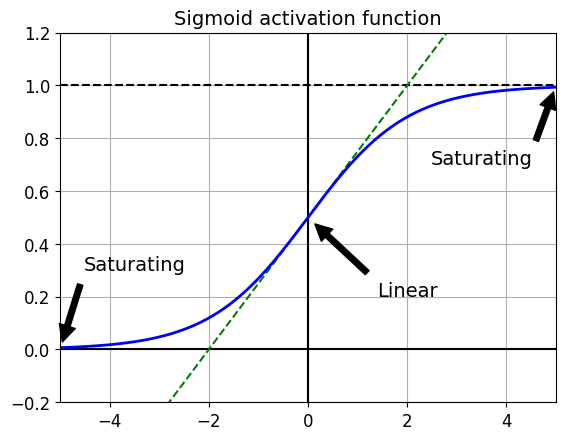

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
init = keras.initializers.VarianceScaling(scale = 2., mode = 'fan_avg', distribution = 'uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

In [6]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

Saving figure leaky_relu_plot


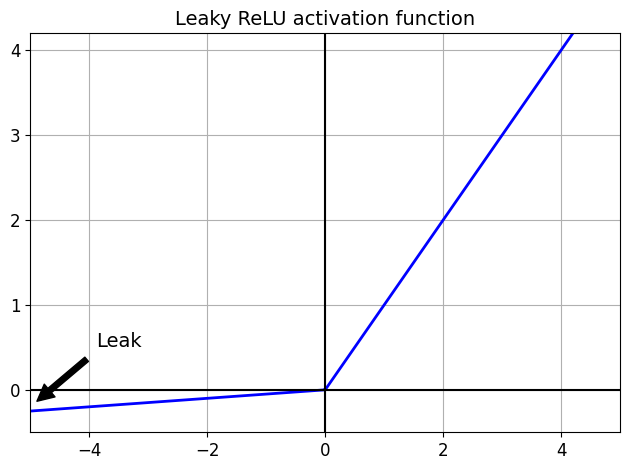

In [7]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

In [8]:
[m for m in dir(keras.activations) if not m.startswith('_')]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'mish',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [9]:
[m for m in dir(keras.layers) if 'relu' in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [10]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [11]:
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer = 'he_normal'),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(100, kernel_initializer = 'he_normal'),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [12]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3),
    metrics = ['accuracy']
)

In [13]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 16s 5ms/step - loss: 1.2587 - accuracy: 0.6121 - val_loss: 0.8687 - val_accuracy: 0.7154
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7840 - accuracy: 0.7414 - val_loss: 0.7058 - val_accuracy: 0.7680
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6762 - accuracy: 0.7754 - val_loss: 0.6396 - val_accuracy: 0.7890
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6186 - accuracy: 0.7940 - val_loss: 0.5880 - val_accuracy: 0.8094
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5812 - accuracy: 0.8057 - val_loss: 0.5570 - val_accuracy: 0.8142
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5540 - accuracy: 0.8133 - val_loss: 0.5345 - val_accuracy: 0.8204
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5333 - accuracy: 0.8201 - val_loss: 0.5159 - val_accuracy

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5156 - accuracy: 0.8220


[0.5156097412109375, 0.8220000267028809]

In [15]:
tf.random.set_seed(42)
np.random.seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(300, kernel_initializer = 'he_normal'),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dense(100, kernel_initializer = 'he_normal'),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [16]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.SGD(1e-3),
              metrics = ['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.4002 - accuracy: 0.5674 - val_loss: 0.9345 - val_accuracy: 0.7114
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8327 - accuracy: 0.7323 - val_loss: 0.7398 - val_accuracy: 0.7638
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7050 - accuracy: 0.7713 - val_loss: 0.6627 - val_accuracy: 0.7904
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6388 - accuracy: 0.7936 - val_loss: 0.6042 - val_accuracy: 0.8100
Epoch 5/10
1719/1719 [==============================] - 9s 6ms/step - loss: 0.5963 - accuracy: 0.8061 - val_loss: 0.5693 - val_accuracy: 0.8186
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5658 - accuracy: 0.8137 - val_loss: 0.5434 - val_accuracy: 0.8246
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5428 - accuracy: 0.8201 - val_loss: 0.5224 - val_accuracy:

In [18]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

Saving figure elu_plot


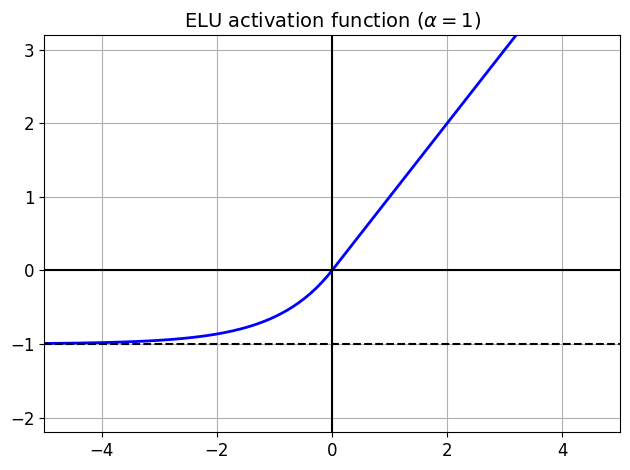

In [19]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

In [20]:
from scipy.special import erfc


alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [21]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

Saving figure selu_plot


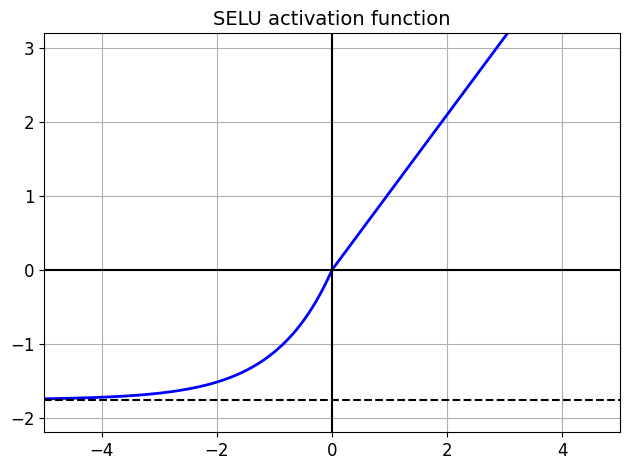

In [22]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

###By default, the SELU hyperparameters (scale and alpha) are tuned in such a way that the mean output of each neuron remains close to 0, and the standard deviation remains close to 1 (assuming the inputs are standardized with mean 0 and standard deviation 1 too). Using this activation function, even a 1,000 layer deep neural network preserves roughly mean 0 and standard deviation 1 across all layers, avoiding the exploding/vanishing gradients problem:

In [23]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [24]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")


In [25]:
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(300, activation = 'selu', kernel_initializer = 'lecun_normal'))

for layer in range(99):
  model.add(tf.keras.layers.Dense(100, activation = 'selu', kernel_initializer = 'lecun_normal'))

model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [27]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.SGD(1e-3),
              metrics = ['accuracy'])

In [28]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [29]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 61s 27ms/step - loss: 1.2890 - accuracy: 0.5042 - val_loss: 0.9404 - val_accuracy: 0.6428
Epoch 2/5
1719/1719 [==============================] - 46s 27ms/step - loss: 0.7729 - accuracy: 0.7133 - val_loss: 0.6533 - val_accuracy: 0.7628
Epoch 3/5
1719/1719 [==============================] - 46s 27ms/step - loss: 0.7067 - accuracy: 0.7401 - val_loss: 0.6555 - val_accuracy: 0.7448
Epoch 4/5
1719/1719 [==============================] - 46s 27ms/step - loss: 0.6023 - accuracy: 0.7814 - val_loss: 0.5679 - val_accuracy: 0.7932
Epoch 5/5
1719/1719 [==============================] - 46s 27ms/step - loss: 0.5697 - accuracy: 0.7958 - val_loss: 0.5298 - val_accuracy: 0.8154


In [30]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.5868 - accuracy: 0.7951


[0.5868126749992371, 0.7950999736785889]

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [33]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 62s 27ms/step - loss: 2.0367 - accuracy: 0.2171 - val_loss: 1.6469 - val_accuracy: 0.3414
Epoch 2/5
1719/1719 [==============================] - 46s 27ms/step - loss: 1.5027 - accuracy: 0.3837 - val_loss: 1.2304 - val_accuracy: 0.5214
Epoch 3/5
1719/1719 [==============================] - 46s 27ms/step - loss: 1.2384 - accuracy: 0.4944 - val_loss: 1.2474 - val_accuracy: 0.4626
Epoch 4/5
1719/1719 [==============================] - 46s 27ms/step - loss: 1.2328 - accuracy: 0.4994 - val_loss: 1.0992 - val_accuracy: 0.5368
Epoch 5/5
1719/1719 [==============================] - 47s 27ms/step - loss: 1.0862 - accuracy: 0.5629 - val_loss: 1.6123 - val_accuracy: 0.3346


###Batch Normalization

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense_210 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_211 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

In [36]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [37]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.SGD(1e-3),
    metrics = ['accuracy']
)

In [38]:
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.8611 - accuracy: 0.7170 - val_loss: 0.5553 - val_accuracy: 0.8134
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5802 - accuracy: 0.8012 - val_loss: 0.4742 - val_accuracy: 0.8364
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5190 - accuracy: 0.8213 - val_loss: 0.4374 - val_accuracy: 0.8484
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4814 - accuracy: 0.8325 - val_loss: 0.4140 - val_accuracy: 0.8552
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4564 - accuracy: 0.8388 - val_loss: 0.3990 - val_accuracy: 0.8598
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4398 - accuracy: 0.8454 - val_loss: 0.3871 - val_accuracy: 0.8632
Epoch 7/10
1719/1719 [==============================] - 9s 6ms/step - loss: 0.4245 - accuracy: 0.8511 - val_loss: 0.3758 - val_accuracy

In [39]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [40]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 1.0031 - accuracy: 0.6852 - val_loss: 0.6653 - val_accuracy: 0.7888
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6733 - accuracy: 0.7807 - val_loss: 0.5509 - val_accuracy: 0.8222
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5929 - accuracy: 0.8028 - val_loss: 0.4973 - val_accuracy: 0.8408
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5431 - accuracy: 0.8175 - val_loss: 0.4644 - val_accuracy: 0.8486
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5104 - accuracy: 0.8247 - val_loss: 0.4420 - val_accuracy: 0.8554
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4890 - accuracy: 0.8311 - val_loss: 0.4255 - val_accuracy: 0.8580
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4725 - accuracy: 0.8356 - val_loss: 0.4117 - val_accurac

###Gradient Clipping

In [41]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
optimizer = keras.optimizers.SGD(clipnorm=1.0)

###Reusing Pretrained Layers

In [42]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [43]:
X_train_A.shape

(43986, 28, 28)

In [44]:
X_train_B.shape

(200, 28, 28)

In [45]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [46]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [47]:
tf.random.set_seed(42)
np.random.seed(42)

In [48]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [49]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [50]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 7s 4ms/step - loss: 0.5803 - accuracy: 0.8135 - val_loss: 0.3885 - val_accuracy: 0.8640
Epoch 2/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3546 - accuracy: 0.8787 - val_loss: 0.3251 - val_accuracy: 0.8849
Epoch 3/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3160 - accuracy: 0.8907 - val_loss: 0.2976 - val_accuracy: 0.8991
Epoch 4/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2958 - accuracy: 0.8981 - val_loss: 0.2869 - val_accuracy: 0.9028
Epoch 5/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2824 - accuracy: 0.9029 - val_loss: 0.2744 - val_accuracy: 0.9076
Epoch 6/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2725 - accuracy: 0.9069 - val_loss: 0.2700 - val_accuracy: 0.9078
Epoch 7/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2644 - accuracy: 0.9088 - val_loss: 0.2672 - val_accuracy:

In [51]:
model_A.save("my_model_A.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [53]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [54]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 2s 52ms/step - loss: 0.7952 - accuracy: 0.4500 - val_loss: 0.6683 - val_accuracy: 0.6339
Epoch 2/20
7/7 [==============================] - 0s 31ms/step - loss: 0.6357 - accuracy: 0.6600 - val_loss: 0.5593 - val_accuracy: 0.7535
Epoch 3/20
7/7 [==============================] - 0s 37ms/step - loss: 0.5259 - accuracy: 0.7700 - val_loss: 0.4819 - val_accuracy: 0.8185
Epoch 4/20
7/7 [==============================] - 0s 36ms/step - loss: 0.4489 - accuracy: 0.8350 - val_loss: 0.4226 - val_accuracy: 0.8611
Epoch 5/20
7/7 [==============================] - 0s 35ms/step - loss: 0.3893 - accuracy: 0.8900 - val_loss: 0.3775 - val_accuracy: 0.8905
Epoch 6/20
7/7 [==============================] - 0s 28ms/step - loss: 0.3425 - accuracy: 0.9250 - val_loss: 0.3404 - val_accuracy: 0.9108
Epoch 7/20
7/7 [==============================] - 0s 28ms/step - loss: 0.3046 - accuracy: 0.9450 - val_loss: 0.3111 - val_accuracy: 0.9199
Epoch 8/20
7/7 [===========

In [55]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_222 (Dense)           (None, 300)               235500    
                                                                 
 dense_223 (Dense)           (None, 100)               30100     
                                                                 
 dense_224 (Dense)           (None, 50)                5050      
                                                                 
 dense_225 (Dense)           (None, 50)                2550      
                                                                 
 dense_226 (Dense)           (None, 50)                2550      
                                                                 
 dense_227 (Dense)           (None, 1)                

In [56]:
model_A = tf.keras.models.load_model("my_model_A.h5")
model_B_on_A = tf.keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [57]:
#Note that model_B_on_A and model_A actually share layers now,
#so when we train one, it will update both models. If we want to avoid that, we need to build model_B_on_A on top of a clone of model_A:

In [58]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))


In [59]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [60]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [61]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 48ms/step - loss: 0.4015 - accuracy: 0.8700 - val_loss: 0.4093 - val_accuracy: 0.8600
Epoch 2/4
7/7 [==============================] - 0s 18ms/step - loss: 0.3771 - accuracy: 0.8950 - val_loss: 0.3872 - val_accuracy: 0.8803
Epoch 3/4
7/7 [==============================] - 0s 18ms/step - loss: 0.3556 - accuracy: 0.9150 - val_loss: 0.3676 - val_accuracy: 0.8966
Epoch 4/4
7/7 [==============================] - 0s 18ms/step - loss: 0.3366 - accuracy: 0.9300 - val_loss: 0.3498 - val_accuracy: 0.9047
Epoch 1/16
7/7 [==============================] - 1s 57ms/step - loss: 0.2984 - accuracy: 0.9350 - val_loss: 0.2825 - val_accuracy: 0.9320
Epoch 2/16
7/7 [==============================] - 0s 32ms/step - loss: 0.2405 - accuracy: 0.9500 - val_loss: 0.2397 - val_accuracy: 0.9462
Epoch 3/16
7/7 [==============================] - 0s 31ms/step - loss: 0.2026 - accuracy: 0.9600 - val_loss: 0.2085 - val_accuracy: 0.9604
Epoch 4/16
7/7 [===============

In [62]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.1492 - accuracy: 0.9715


[0.14923050999641418, 0.9714999794960022]

In [63]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.0780 - accuracy: 0.9940


[0.07804007083177567, 0.9940000176429749]

In [64]:
(100 - 97.05) / (100 - 99.40)

4.916666666666718

###Faster Optimizers

In [65]:
#Momentum optimization
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [66]:
#Nesterov Accelerated Gradient
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)


In [67]:
#AdaGrad
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

In [68]:
#RMSProp
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [69]:
#Adam Optimization
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [70]:
#Adamax Optimization
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [71]:
#Nadam Optimization
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

###Learning Rate Scheduling
Power Scheduling
lr = lr0 / (1 + steps / s)**c

Keras uses c=1 and s = 1 / decay

In [72]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [73]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 7s 3ms/step - loss: 0.4842 - accuracy: 0.8295 - val_loss: 0.3984 - val_accuracy: 0.8618
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3768 - accuracy: 0.8660 - val_loss: 0.3645 - val_accuracy: 0.8692
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3435 - accuracy: 0.8762 - val_loss: 0.3735 - val_accuracy: 0.8676
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3213 - accuracy: 0.8847 - val_loss: 0.3421 - val_accuracy: 0.8776
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3039 - accuracy: 0.8907 - val_loss: 0.3404 - val_accuracy: 0.8782
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2879 - accuracy: 0.8964 - val_loss: 0.3376 - val_accuracy: 0.8810
Epoch 7/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2757 - accuracy: 0.9003 - val_loss: 0.3353 - val_accuracy:

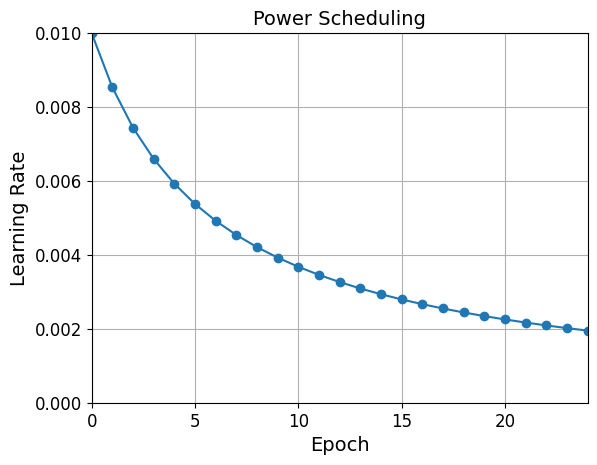

In [74]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [75]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [76]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [77]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 9s 4ms/step - loss: 0.7423 - accuracy: 0.7784 - val_loss: 0.6676 - val_accuracy: 0.8060 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6126 - accuracy: 0.8109 - val_loss: 0.6574 - val_accuracy: 0.7918 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5682 - accuracy: 0.8206 - val_loss: 0.8412 - val_accuracy: 0.8042 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5448 - accuracy: 0.8341 - val_loss: 0.5335 - val_accuracy: 0.8228 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4921 - accuracy: 0.8485 - val_loss: 0.4709 - val_accuracy: 0.8590 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4464 - accuracy: 0.8591 - val_loss: 0.5035 - val_accuracy: 0.8462 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 7s

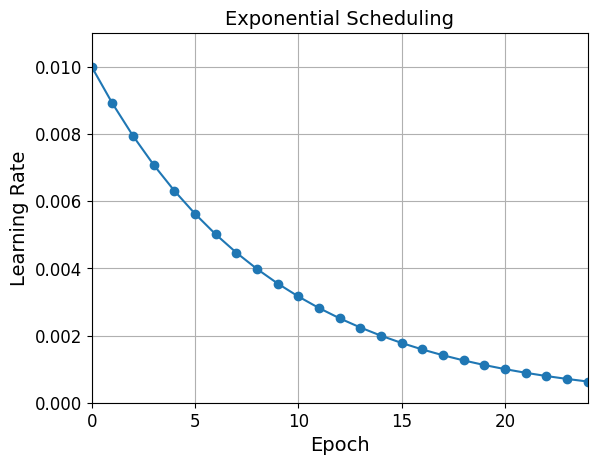

In [78]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [79]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)


In [80]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.learning_rate)
        K.set_value(self.model.optimizer.learning_rate, lr * 0.1**(1 / self.s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7151 - accuracy: 0.7841 - val_loss: 0.5716 - val_accuracy: 0.8168 - lr: 0.0089
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5975 - accuracy: 0.8130 - val_loss: 0.5259 - val_accuracy: 0.8248 - lr: 0.0079
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5729 - accuracy: 0.8265 - val_loss: 0.5345 - val_accuracy: 0.8418 - lr: 0.0071
Epoch 4/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5217 - accuracy: 0.8380 - val_loss: 0.4646 - val_accuracy: 0.8572 - lr: 0.0063
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4674 - accuracy: 0.8533 - val_loss: 0.4422 - val_accuracy: 0.8562 - lr: 0.0056
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4322 - accuracy: 0.8628 - val_loss: 0.5306 - val_accuracy: 0.8592 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 8

In [81]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

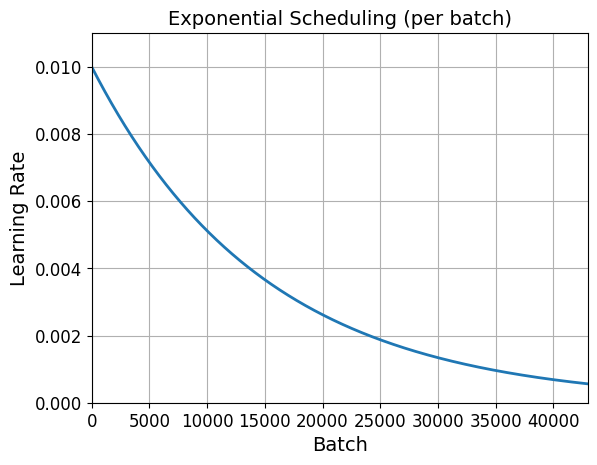

In [82]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

#Piecewise Constant Scheduling

In [83]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [84]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [85]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7409 - accuracy: 0.7774 - val_loss: 0.6795 - val_accuracy: 0.8154 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7761 - accuracy: 0.7752 - val_loss: 0.8737 - val_accuracy: 0.7488 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.9993 - accuracy: 0.7084 - val_loss: 1.2369 - val_accuracy: 0.5916 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0882 - accuracy: 0.6047 - val_loss: 1.0698 - val_accuracy: 0.6714 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0821 - accuracy: 0.6042 - val_loss: 1.0153 - val_accuracy: 0.6040 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8827 - accuracy: 0.6491 - val_loss: 0.8395 - val_accuracy: 0.6592 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 7s

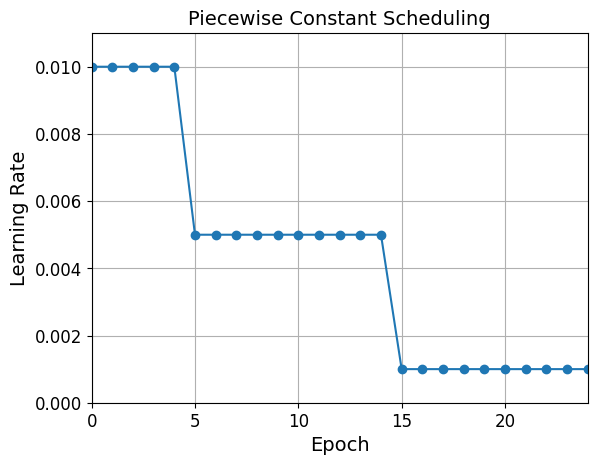

In [86]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [87]:
tf.random.set_seed(42)
np.random.seed(42)

In [88]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 5)

model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(300, activation = 'selu', kernel_initializer = 'lecun_normal'),
    keras.layers.Dense(100, activation ='selu', kernel_initializer = 'lecun_normal'),
    keras.layers.Dense(10, activation = 'softmax')
])


optimizer = tf.keras.optimizers.SGD(learning_rate = 0.02, momentum = 0.9)
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])
n_epochs = 25

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6000 - accuracy: 0.8052 - val_loss: 0.4412 - val_accuracy: 0.8564 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4928 - accuracy: 0.8394 - val_loss: 0.5768 - val_accuracy: 0.8370 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5233 - accuracy: 0.8407 - val_loss: 0.6459 - val_accuracy: 0.8482 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5102 - accuracy: 0.8468 - val_loss: 0.4875 - val_accuracy: 0.8580 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5115 - accuracy: 0.8498 - val_loss: 0.5699 - val_accuracy: 0.8356 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5216 - accuracy: 0.8509 - val_loss: 0.8199 - val_accuracy: 0.8250 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 7s

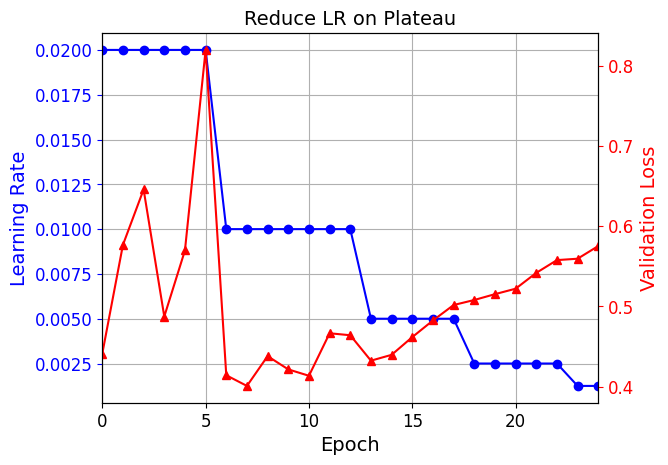

In [89]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

#tf.keras schedulers

In [90]:
s = 20 * len(X_train) // 32
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0387 - accuracy: 0.9883 - val_loss: 0.5783 - val_accuracy: 0.8908
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0371 - accuracy: 0.9889 - val_loss: 0.5871 - val_accuracy: 0.8898
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0358 - accuracy: 0.9896 - val_loss: 0.5873 - val_accuracy: 0.8904
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0346 - accuracy: 0.9901 - val_loss: 0.5955 - val_accuracy: 0.8916
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0336 - accuracy: 0.9903 - val_loss: 0.5956 - val_accuracy: 0.8914
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0328 - accuracy: 0.9910 - val_loss: 0.6043 - val_accuracy: 0.8906
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0321 - accuracy: 0.9912 - val_loss: 0.6060 - val_accuracy:

In [91]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [92]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])


Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0271 - accuracy: 0.9935 - val_loss: 0.6291 - val_accuracy: 0.8898
Epoch 2/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0271 - accuracy: 0.9934 - val_loss: 0.6292 - val_accuracy: 0.8898
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0270 - accuracy: 0.9934 - val_loss: 0.6297 - val_accuracy: 0.8900
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0269 - accuracy: 0.9935 - val_loss: 0.6298 - val_accuracy: 0.8902
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0269 - accuracy: 0.9934 - val_loss: 0.6301 - val_accuracy: 0.8904
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0269 - accuracy: 0.9935 - val_loss: 0.6303 - val_accuracy: 0.8902
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0268 - accuracy: 0.9935 - val_loss: 0.6301 - val_accuracy:

#Avoiding Overfitting Through Regularization

In [93]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [94]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = 'elu',
                       kernel_initializer = 'he_normal',
                       kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation = 'elu',
                       kernel_initializer = 'he_normal',
                       kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation = 'softmax',
                       kernel_regularizer = keras.regularizers.l2(0.01))
])

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'nadam',
              metrics = ['accuracy'])

n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 8s 4ms/step - loss: 1.6515 - accuracy: 0.8136 - val_loss: 0.7080 - val_accuracy: 0.8402
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7193 - accuracy: 0.8280 - val_loss: 0.6947 - val_accuracy: 0.8336


In [95]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation = 'elu',
                           kernel_initializer = 'he_normal',
                           kernel_regularizer = keras.regularizers.l2(0.01))


model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 4ms/step - loss: 1.6076 - accuracy: 0.8134 - val_loss: 0.7106 - val_accuracy: 0.8406
Epoch 2/2
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7229 - accuracy: 0.8270 - val_loss: 0.6937 - val_accuracy: 0.8356


#Dropout

In [96]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(300, activation = 'elu', kernel_initializer = 'he_normal'),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(100, activation = 'elu', kernel_initializer = 'he_normal'),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 10s 4ms/step - loss: 0.5661 - accuracy: 0.8043 - val_loss: 0.3650 - val_accuracy: 0.8688
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4222 - accuracy: 0.8435 - val_loss: 0.3333 - val_accuracy: 0.8770


#Alpha Dropout


In [97]:
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 7s 3ms/step - loss: 0.6609 - accuracy: 0.7604 - val_loss: 0.5565 - val_accuracy: 0.8448
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5572 - accuracy: 0.7953 - val_loss: 0.5505 - val_accuracy: 0.8422
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5246 - accuracy: 0.8063 - val_loss: 0.4860 - val_accuracy: 0.8598
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5055 - accuracy: 0.8121 - val_loss: 0.4763 - val_accuracy: 0.8634
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4907 - accuracy: 0.8182 - val_loss: 0.4580 - val_accuracy: 0.8642
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4804 - accuracy: 0.8228 - val_loss: 0.4716 - val_accuracy: 0.8638
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4691 - accuracy: 0.8251 - val_loss: 0.4697 - val_accuracy:

In [98]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4584 - accuracy: 0.8645


[0.4583685100078583, 0.8644999861717224]

In [99]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.3390 - accuracy: 0.8843


[0.3389517366886139, 0.8842727541923523]

In [100]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 6s 4ms/step - loss: 0.4175 - accuracy: 0.8444


#MC Dropout

In [101]:
tf.random.set_seed(42)
np.random.seed(42)

In [104]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [111]:
model(X_test_scaled, training=True)

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[5.2404737e-08, 6.1574156e-08, 1.1133122e-08, ..., 4.1369665e-02,
        1.1913626e-05, 9.5756495e-01],
       [4.8628692e-07, 1.8804146e-13, 9.9970490e-01, ..., 1.5404700e-11,
        4.7342086e-10, 1.4314256e-09],
       [6.0846603e-15, 1.0000000e+00, 2.0505031e-17, ..., 2.6750731e-18,
        7.2340330e-25, 8.4477079e-24],
       ...,
       [2.2268718e-02, 3.5508149e-06, 6.8362441e-04, ..., 1.8585059e-05,
        9.3005461e-01, 1.9111071e-06],
       [5.9030397e-10, 9.9997509e-01, 3.1881220e-10, ..., 1.0505597e-13,
        5.6806366e-13, 1.3741977e-13],
       [1.0189372e-06, 1.3509536e-05, 3.2405667e-06, ..., 6.1242765e-01,
        6.7765446e-05, 7.6669483e-03]], dtype=float32)>

In [112]:
np.round(model.predict(X_test_scaled[:1]), 2)

1/1 [==============================] - 0s 137ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [113]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.86]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.18, 0.  , 0.76]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.19, 0.  , 0.75]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.62, 0.  , 0.38]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.03, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.08, 0.  , 0

In [114]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.16, 0.  , 0.79]],
      dtype=float32)

In [115]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.21, 0.  , 0.23]],
      dtype=float32)

In [116]:
y_pred = np.argmax(y_proba, axis=1)

In [117]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [118]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8678

In [119]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [120]:
tf.random.set_seed(42)
np.random.seed(42)

In [121]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [122]:

mc_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 mc_alpha_dropout (MCAlphaD  (None, 784)               0         
 ropout)                                                         
                                                                 
 dense_255 (Dense)           (None, 300)               235500    
                                                                 
 mc_alpha_dropout_1 (MCAlph  (None, 300)               0         
 aDropout)                                                       
                                                                 
 dense_256 (Dense)           (None, 100)               30100     
                                                                 
 mc_alpha_dropout_2 (MCAlph  (None, 100)             

In [123]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [124]:
mc_model.set_weights(model.get_weights())

In [125]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

1/1 [==============================] - 0s 18ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.17, 0.  , 0.77]],
      dtype=float32)

#Max norm

In [126]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [127]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 15s 4ms/step - loss: 0.4767 - accuracy: 0.8331 - val_loss: 0.3681 - val_accuracy: 0.8686
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3561 - accuracy: 0.8703 - val_loss: 0.4065 - val_accuracy: 0.8538


In [128]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))

In [129]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [130]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [131]:

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

170498071/170498071 [==============================] - 5s 0us/step


In [132]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [133]:
%tensorboard --logdir=./my_cifar10_logs --port=6006

<IPython.core.display.Javascript object>

In [134]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 27s 12ms/step - loss: 6.0107 - accuracy: 0.1595 - val_loss: 2.2286 - val_accuracy: 0.2194
Epoch 2/100
   6/1407 [..............................] - ETA: 15s - loss: 2.2333 - accuracy: 0.1615

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1407/1407 [==============================] - 18s 13ms/step - loss: 2.0933 - accuracy: 0.2450 - val_loss: 2.1053 - val_accuracy: 0.2472
Epoch 3/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.9666 - accuracy: 0.2832 - val_loss: 1.9219 - val_accuracy: 0.2848
Epoch 4/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.8863 - accuracy: 0.3097 - val_loss: 1.9571 - val_accuracy: 0.3018
Epoch 5/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.8233 - accuracy: 0.3338 - val_loss: 1.8638 - val_accuracy: 0.3134
Epoch 6/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.7740 - accuracy: 0.3555 - val_loss: 1.7491 - val_accuracy: 0.3582
Epoch 7/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.7262 - accuracy: 0.3737 - val_loss: 1.8131 - val_accuracy: 0.3358
Epoch 8/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.6866 - accuracy: 0.3871 - val_loss: 1.6660 - val_

In [135]:
model = keras.models.load_model("my_cifar10_model.h5")
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 3ms/step - loss: 1.5011 - accuracy: 0.4774


[1.501107096672058, 0.477400004863739]

In [136]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 67s 29ms/step - loss: 1.8436 - accuracy: 0.3405 - val_loss: 1.6513 - val_accuracy: 0.4078
Epoch 2/100
1407/1407 [==============================] - 41s 29ms/step - loss: 1.6720 - accuracy: 0.4032 - val_loss: 1.5711 - val_accuracy: 0.4330
Epoch 3/100
1407/1407 [==============================] - 42s 30ms/step - loss: 1.6042 - accuracy: 0.4286 - val_loss: 1.5231 - val_accuracy: 0.4478
Epoch 4/100
1407/1407 [==============================] - 40s 28ms/step - loss: 1.5543 - accuracy: 0.4475 - val_loss: 1.5052 - val_accuracy: 0.4664
Epoch 5/100
1407/1407 [==============================] - 40s 28ms/step - loss: 1.5094 - accuracy: 0.4632 - val_loss: 1.4311 - val_accuracy: 0.4922
Epoch 6/100
1407/1407 [==============================] - 40s 29ms/step - loss: 1.4706 - accuracy: 0.4792 - val_loss: 1.4098 - val_accuracy: 0.4978
Epoch 7/100
1407/1407 [==============================] - 40s 29ms/step - loss: 1.4379 - accuracy: 0.4901 - val_loss: 1

[1.3007653951644897, 0.5475999712944031]

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)